In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import cv2 as cv
import numpy as np
from IPython.display import display
from PIL import Image

## Remove L

In [14]:
def remove_Lines(image,x,y):
    kernel = np.ones((x,y) , np.uint8)
    closed = cv2.morphologyEx(image,cv2.MORPH_CLOSE,kernel)
    return closed
    

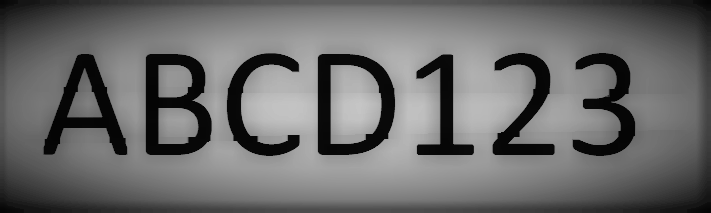

In [172]:
img = cv2.imread("abcd123.png",0)
res1 = remove_Lines(img,7,7)
display(Image.fromarray(res1))

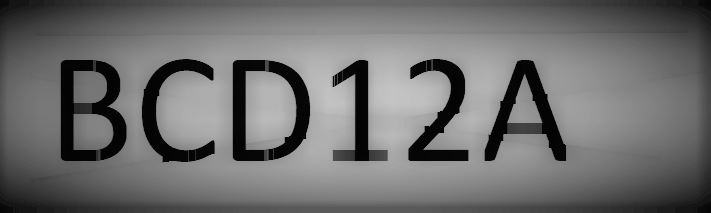

In [173]:
img2 = cv2.imread("bcd12a.png",0)
res2 = remove_Lines(img2,11,1)
display(Image.fromarray(res2))

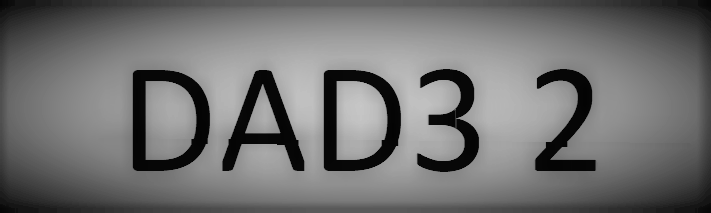

In [174]:
img3 = cv2.imread("dad32.png",0)
res3 = remove_Lines(img3,10,2)
display(Image.fromarray(res3))

## Thresholding

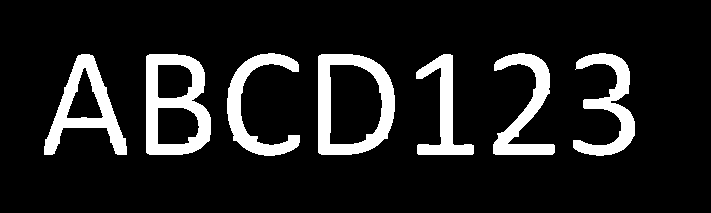

In [175]:
thrsh1 = cv2.adaptiveThreshold(res1 , 255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,27,19)
display(Image.fromarray(thrsh1))

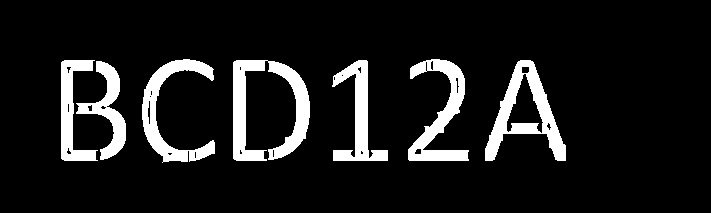

In [176]:
thrsh2 = cv2.adaptiveThreshold(res2 , 255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,15,11)
display(Image.fromarray(thrsh2))

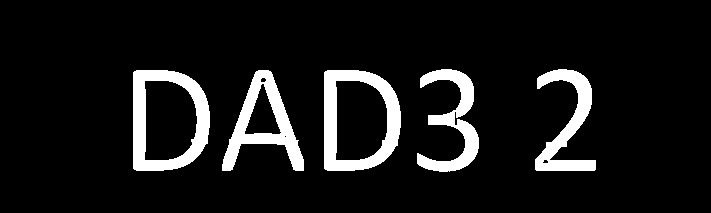

In [177]:
thrsh3 = cv2.adaptiveThreshold(res3 , 255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,17,11)
display(Image.fromarray(thrsh3))

## Contouring

In [178]:
def contour(bw , img , thrshld):
    contours,hirearchy = cv.findContours(bw, cv.RETR_EXTERNAL , cv.CHAIN_APPROX_SIMPLE)
    cv.drawContours(img , contours , -1 , (0,255,0) , 3)
    for i in range(len(contours)):
        cnt = contours[i]
        area = cv.contourArea(cnt)
        if area > thrshld:
            x,y,w,h = cv.boundingRect(cnt)
            cv.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
            croped = img[y:y+h , x:x+w]
            display(Image.fromarray(croped))

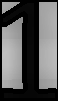

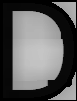

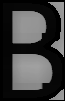

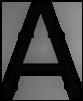

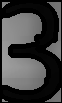

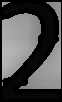

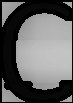

In [179]:
contour(thrsh1,res1,100)

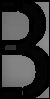

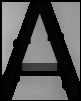

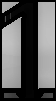

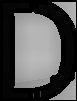

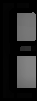

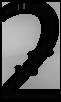

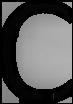

In [180]:
contour(thrsh2,res2,1e2)

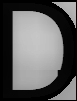

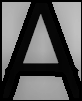

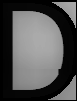

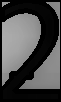

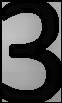

In [181]:
contour(thrsh3,res3,2000)